In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

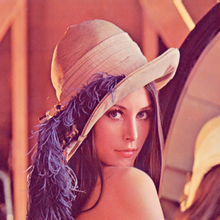

In [3]:
Image.open('lenna.png')

In [4]:
img = np.asarray(Image.open('lenna.png'))

In [5]:
img.shape

(220, 220, 3)

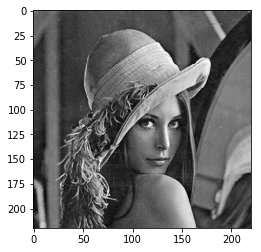

In [6]:
plt.imshow(img[:, :, 2], cmap='gray')

In [7]:
R = img[:, :, 0]
R = R.reshape((-1, ))
G = img[:, :, 1]
G = G.reshape((-1, ))
B = img[:, :, 2]
B = B.reshape((-1, ))

In [8]:
R.shape, G.shape, B.shape

((48400,), (48400,), (48400,))

In [9]:
R.reshape((110, 440)).shape

(110, 440)

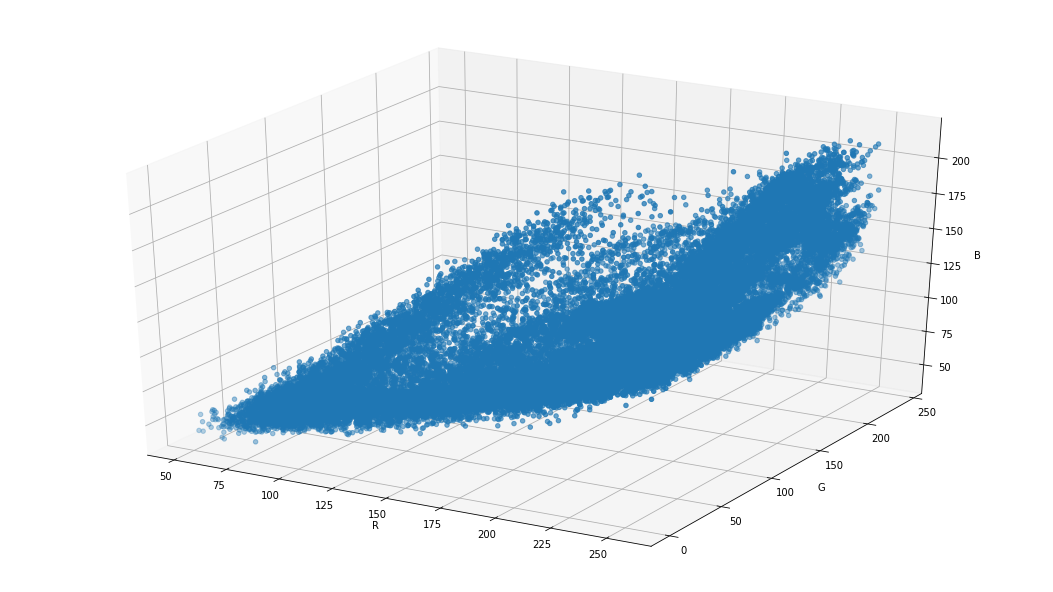

In [10]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.scatter(R, G, B)

In [11]:
X = np.random.random(size=(100,))
Y = np.random.random(size=(100,))

In [12]:
def DBScan(X, Y, minPoints=4, e=0.2, debug=False):
    assert len(X) == len(Y)
    states = np.zeros_like(X)
                
    classes = []
    
    if debug: print("init...")
    idle = False
    while not idle:
        if debug: print("searching...")
        cluster = []
        dists = []
                
        maxIter = int(0.1*len(X))
        itera = 0
        n = int(np.random.random()*len(X))
        while states[n] == 1 and not idle:
            if debug: print("iterating...")
            itera += 1
            n = int(np.random.random()*len(X))
            if itera>maxIter:
                idle = True
                
        x0 = X[n]
        y0 = Y[n]

        virtualStates = np.copy(states) 
        virtualCluster = [] 
        # TODO: Solve bug with cluster...
        scanning = True
        while scanning:
            if debug: print("scanning...")
            neighbours = 0
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                if (x0 - e) < x < (x0 + e) and (y0 - e) < y < (y0 + e) and not i == n and not states[i] == 1:
                    neighbours += 1
                    virtualStates[i] = 1
                    virtualCluster.append((x, y))
                    px = x
                    py = y
        
                    dists.append(np.sqrt((px - x0)**2 + (py - y0)**2))

            if neighbours > minPoints:
                scanning = True
                states = virtualStates
                cluster = virtualCluster
                longestPoint = cluster[np.argmax(dists)]
                x0, y0 = longestPoint
                
            else:
                scanning = False

        classes.append(cluster)
    return classes

In [19]:
def DBScan3D(X, Y, Z, minPoints=4, e=0.2, debug=False):
    assert len(X) == len(Y) == len(Z)
    states = np.zeros_like(X)
                
    classes = []
    
    if debug: print("init...")
    idle = False
    while not idle:
        if debug: print("searching...")
        cluster = []
        dists = []
                
        maxIter = int(0.1*len(X))
        itera = 0
        n = int(np.random.random()*len(X))
        while states[n] == 1 and not idle:
            if debug: print("iterating...")
            itera += 1
            n = int(np.random.random()*len(X))
            if itera>maxIter:
                idle = True
                
        x0 = X[n]
        y0 = Y[n]
        z0 = Z[n]

        virtualStates = np.copy(states) 
        virtualCluster = [] 
        # TODO: Solve bug with cluster...
        scanning = True
        while scanning:
            if debug: print("scanning...")
            neighbours = 0
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                z = Z[i]
                if (x0 - e) < x < (x0 + e) and (y0 - e) < y < (y0 + e) and (z0 - e) < z < (z0 + e) and not i == n and not states[i] == 1:
                    neighbours += 1
                    virtualStates[i] = 1
                    virtualCluster.append((x, y, z)) 
                    dists.append(np.sqrt((x - x0)**2 + (y - y0)**2 + (z - z0)**2))

            if neighbours > minPoints:
                scanning = True
                states = virtualStates
                cluster = virtualCluster
                longestPoint = cluster[np.argmax(dists)]
                x0, y0, z0 = longestPoint
                
            else:
                scanning = False

        classes.append(cluster)
    return classes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in ubyte_scalars


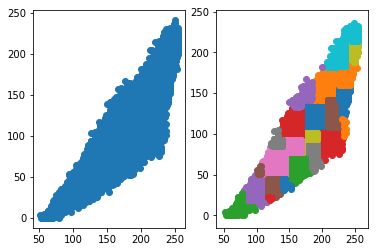

In [15]:
plt.subplot(1,2,1)
plt.scatter(R, G) # [:int(len(R)/2)]
plt.subplot(1,2,2)
classes = DBScan(R, G, e=20.)
for i in range(len(classes)-1):
    try:
        plt.scatter(np.array(classes[i])[:, 0], np.array(classes[i])[:, 1])
    except:
        pass


In [20]:
classes = DBScan3D(R, G, B, e=20.)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ubyte_scalars


In [43]:
colors = []
for c in classes:
    try:
        newColor = np.mean(np.array(c),axis=0)
        if len(newColor):
            colors.append(newColor)
    except:
        pass

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[array([ 186.64262821,   79.44724893,   86.45566239]),
 array([ 234.78033794,  192.86943164,  160.64285714]),
 array([ 93.14841544,  22.71320992,  64.02698463]),
 array([ 136.94288793,   87.41810345,  136.15948276]),
 array([ 136.28658331,   47.8154782 ,   73.00101386]),
 array([ 220.34539828,  130.40594726,  117.70694295]),
 array([ 194.73209549,  123.51399941,  120.82169172]),
 array([ 217.57134956,  172.51659292,  162.32964602]),
 array([ 212.84892086,   99.60594105,   96.87978649]),
 array([ 232.97562957,  200.80178716,  186.52071487]),
 array([ 161.51403061,   68.4432398 ,   84.47512755]),
 array([ 172.33272727,  101.01454545,  114.38545455]),
 array([ 222.66240157,  153.48720472,  138.81003937]),
 array([ 238.83004926,  182.17487685,  129.36699507]),
 array([ 119.86486486,   55.36003861,  102.68146718]),
 array([ 236.8986694 ,  155.44012282,  120.68474923]),
 array([ 188.4787234 ,  124.54255319,  148.65957447]),
 array([ 104.28068862,   34.6744012 ,   78.28368263]),
 array([ 222.

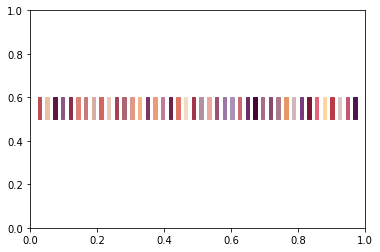

In [75]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

someX, someY = 0.5, 0.5
plt.figure()
currentAxis = plt.gca()
for i, color in enumerate(colors):
#     color = color.astype('int')
#     (color[0], color[1], color[2])
    currentAxis.add_patch(Rectangle((0.023 + i*0.023, someY), 0.01, 0.1, fill=True, color=color/255))
plt.show()